# Credit Card Lead Prediction

Importing libraries

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

importing dataset

In [2]:
data_train = pd.read_csv(r'C:\Users\NICK\Desktop\train_s3TEQDk.csv')
data_test = pd.read_csv(r'C:\Users\NICK\Desktop\test_mSzZ8RL.csv')

In [3]:
data_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
data_train.info

<bound method DataFrame.info of               ID  Gender  Age Region_Code     Occupation Channel_Code  \
0       NNVBBKZB  Female   73       RG268          Other           X3   
1       IDD62UNG  Female   30       RG277       Salaried           X1   
2       HD3DSEMC  Female   56       RG268  Self_Employed           X3   
3       BF3NC7KV    Male   34       RG270       Salaried           X1   
4       TEASRWXV  Female   30       RG282       Salaried           X1   
...          ...     ...  ...         ...            ...          ...   
245720  BPAWWXZN    Male   51       RG284  Self_Employed           X3   
245721  HFNB7JY8    Male   27       RG268       Salaried           X1   
245722  GEHAUCWT  Female   26       RG281       Salaried           X1   
245723  GE7V8SAH  Female   28       RG273       Salaried           X1   
245724  BOCZSWLJ    Male   29       RG269       Salaried           X1   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0            43   

In [5]:
data_train.columns
data_test.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [6]:
data_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
data_train.shape


(245725, 11)

In [8]:
data_test.shape

(105312, 10)

In [9]:
data_train.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


from above correlation matrix we come to know that there is positive relation between age and vintage. And also have relation between vintage and Is_lead.

In [10]:
#finding missing values
data_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
data_train=data_train.dropna()

In [12]:
data_train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [13]:
data_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [14]:
#data_test=data_train.dropna()

In [15]:
data_test["Credit_Product"].fillna("No",inplace = True)

In [16]:
data_test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

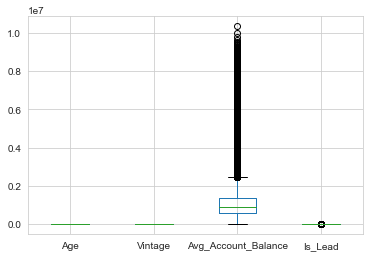

In [17]:
data_train.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000156B9193E20>,
      dtype=object)

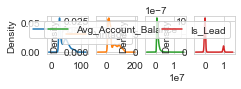

In [18]:
#Density plot
data_train.plot(kind='density', subplots=True, layout=(5,7), sharex=False, sharey=False)

Encoding variables

In [19]:
data_train = data_train.replace(to_replace=['Female','Male','No','Yes','X1','X2','X3','X4','Salaried','Self_Employed','Entrepreneur','Other'],value=['1','0','0','1','1','2','3','4','1','2','3','4']) 
data_test = data_test.replace(to_replace=['Female','Male','No','Yes','X1','X2','X3','X4','Salaried','Self_Employed','Entrepreneur','Other'],value=['1','0','0','1','1','2','3','4','1','2','3','4']) 

spliting data

In [21]:
x_train =  data_train[[ 'Gender', 'Age', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]
y_train = data_train.Is_Lead
x_test =  data_test[[ 'Gender', 'Age', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]


Model Building

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model_lr = LinearRegression()

In [24]:
model_lr.fit(x_train,y_train)
model_lr.score(x_train,y_train)

0.13649130326706482

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [27]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [28]:
model.score(x_train, y_train)

0.8460582255083179

In [29]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for train dataset
y_pred = clf.predict(x_train)

In [33]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9999584103512015


Accuracy of decision tree classifier is 0.9999584103512015.

In [35]:
#Predict the response for test dataset
y_pred_test = clf.predict(x_test)

In [36]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
data_test.ID

0         VBENBARO
1         CCMEWNKY
2         VK3KGA9M
3         TT8RPZVC
4         SHQZEYTZ
            ...   
105307    DBENJOYI
105308    CWQ72DWS
105309    HDESC8GU
105310    2PW4SFCA
105311    F2NOYPPZ
Name: ID, Length: 105312, dtype: object

In [38]:
solution = pd.DataFrame({'ID':data_test.ID,'Is_Lead':y_pred_test})
solution

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [39]:
#file_name =  'solution.xlsx'

In [45]:
#solution.to_csv('JobAThon1.csv')

In [40]:
solution.to_excel('credit_card2.xlsx')